In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Outils fournis

In [2]:
def dimensions(pix):
    """Retourne les dimensions (Largeur, Hauteur) d'une matrice
    de pixels"""
    return len(pix[0]), len(pix) 

def matrice_to_image(pix, mode = '1', fichier='image.png', res=1):
    """Convertit en image  une matrice de pixels pix 
    de dimensions (ligne, colonnes)=(nline, ncol)
    en représentant sur l'écran chaque case de pix
    par un carré de coté resolution pixels.
    Le mode de l'image peut être :
    '1'  : binaire 0 ou 1
    'L' : niveaux de gris entre 0 et 255
    'RGB' : triplet de valeurs (Rouge, Vert, Bleu) entre 0 et 255
    """
    #on force la conversion en type np.uint8 si pix est un tableau numpy
    if isinstance(pix, np.ndarray):
        pix = pix.astype(np.uint8)
    #précondition 1 : list doit être une matrice de pixels
    precondition1 = isinstance(pix, (list, np.ndarray)) \
                   and len(pix) > 0 \
                and all(isinstance(pix[k], (list, np.ndarray)) \
                        and  len(pix[k]) == len(pix[0])  \
                        for k in range(len(pix)))
    assert precondition1, "Il faut passer en paramètre une matrice de pixels"
    #dimensions de la matrice de pixels
    largeur_pix, hauteur_pix = dimensions(pix)
    #préconditions sur la matrice de pixels pour respecter les contraintes du mode de l'image 
    precondition2 =  mode == '1' and \
                    all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 1 \
                        for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition3 =  mode == 'L' and \
                    all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 255 \
                        for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition4 = mode == 'RGB' and \
                    all(isinstance(pix[y][x], (list, np.ndarray)) \
                        and len(pix[y][x]) == 3 \
                        and  all(isinstance(pix[y][x][k], (int, np.uint8)) \
                                 and 0 <= pix[y][x][k] <= 255 \
                            for k in range(3)) \
                        for y in range(hauteur_pix) for x in range(largeur_pix))
    assert precondition2 or precondition3 or precondition4, "matrice de pixels et mode incompatibles !"    
    #dimensions de la matrice de pixels
    hauteur_newpix, largeur_newpix = res * hauteur_pix, res * largeur_pix
    #copie de pix sous forme de tableau numpy agrandi d'un coefficient res 
    if mode != 'RGB':
        newpix =  np.zeros((hauteur_newpix, largeur_newpix), dtype='uint8')
    else:
        newpix =  np.zeros((hauteur_newpix, largeur_newpix, 3), dtype='uint8')
    #initialsation des blocs de taille res * res de newpix
    #avec des 0 si pix[i][j] == 0 et 1 sinon
    for y in range(hauteur_newpix):
        for x in range(largeur_newpix):
            ypix = y // res
            xpix = x // res
            newpix[y][x] = pix[ypix][xpix]   
    if mode != 'RGB':
        #création d'un objet image PIL en mode binaire (pixel de valeur 0 ou 1)
        im = Image.new(mode, (largeur_newpix, hauteur_newpix))  #Image.new(mode, (Largeur, Hauteur))  
        #on remplit l'image avec les valeurs de newpix
        im.putdata(newpix.flatten())
    else:
        im = Image.fromarray(newpix)
    #enregistrement de l'image sur le disque
    im.save(fichier)
    #affichage de l'image
    #plt.axis('off') #to disable xticks and yticks
    #cas des images binaires 
    if mode == '1':
        plt.imshow(newpix,cmap=plt.cm.gray, vmin= 0, vmax = 1)
    # cas des images en niveaux de gris
    elif mode == 'L':
        plt.imshow(newpix,cmap=plt.cm.gray, vmin= 0, vmax = 255)
    #cas des images RGB
    else:
        plt.imshow(newpix)
        
def image_to_matrice(fichier):
    #ouverture de l'image avec PIL
    im = Image.open(fichier)
    #conversion de l'image en matrice de pixels / tableau numpy
    pix = np.array(im, dtype = np.uint8)
    #conversion de la matrice de pixels en liste Python
    pix = pix.tolist()
    return pix

def matrice_vide(ncol, nlig, mode):
    """Retourne une matrice de pixels de n lignes et m colonnes
    représentant une image noire dans le mode  d'image choisi"""
    assert mode in ['1', 'L', 'RGB'], "mode doit appartenir à ['1', 'L', 'RGB']"
    if mode in ['1', 'L']:
        return [[0 for x in range(ncol)] for y in range(nlig)]
    else:               
        return [[[0,0,0] for x in range(ncol)] for y in range(nlig)]

## Exercice 1

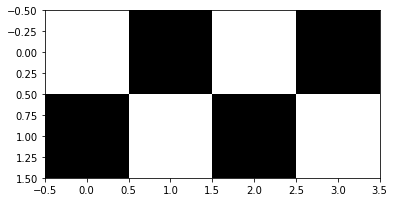

In [3]:
matrice_to_image([[1,0,1,0],[0,1,0,1]], mode = '1', fichier='exemple_binaire_4x2.png',res=1)

![Edition du fichier binaire](exo1_hexedit.png)

* Histoire 

Le Portable Network Graphics (PNG) est un format ouvert d’images numériques, qui a été créé pour remplacer le format GIF, à l’époque propriétaire et dont la compression était soumise à un brevet. Le PNG est un format sans perte spécialement adapté pour publier des images simples comprenant des aplats de couleurs.  


* Pour les images synthétiques

PNG est particulièrement approprié lorsqu’il s’agit d’enregistrer des images synthétiques destinées au Web comme des graphiques, des icônes, des images représentant du texte (bonne conservation de la lisibilité), ou des images avec des dégradés. Le PNG surpasse régulièrement le format GIF en ce qui concerne la réduction de la taille des fichiers (avec une palette de couleurs bien choisie) ou la qualité (puisqu’il n’est pas limité à 256 couleurs).

* Pour les photos

Les caractéristiques de PNG lui permettent d’enregistrer des photographies sans perte de données, au détriment de la taille du fichier qui reste logiquement très supérieure à celle de formats avec perte de données destinés aux photographies, comme JPEG ou JPEG 2000. 


*Source :*  <https://fr.wikipedia.org/wiki/Portable_Network_Graphics>

![Analyse de fichier PNG](analyse-fichierpng.png)

## Exercice 2

* __Question 1 :__ [Correction sur Python Tutor](http://pythontutor.com/visualize.html#code=M%20%3D%20%5B%20%5B0,%200,%200%5D%20for%20i%20in%20range%283%29%20%5D%0AN%20%3D%20M%0AP%20%3D%20%5Be%20for%20e%20in%20M%20%5D%0AQ%20%3D%20%5B%20e%5B%3A%5D%20for%20e%20in%20M%20%5D%0AM%5B2%5D%5B1%5D%20%3D%203&cumulative=false&curInstr=23&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [4]:
def max_tab2d(tab):
    """Retourne le maximum d'un tableau à 2 dimensions"""
    maxi = float('-inf')
    for y in range(len(tab)): #boucle sur les lignes
        for x in range(len(tab[y])): # boucle sur les colonnes
            if tab[y][x] > maxi:
                maxi = tab[y][x]
    return maxi

In [5]:
assert max_tab2d([[-1,-2],[-2,-3,-0.5]]) == -0.5
assert max_tab2d([[1,2],[float('inf'),10]]) == float('inf')
assert max_tab2d([[1,2],[8,0]]) == 8
assert max_tab2d([[8, float('-inf')],[]]) == 8

In [6]:
def moyenne_tab2d(tab):
    """Retourne le maximum d'un tableau à 2 dimensions"""
    somme = 0
    nbelement = 0
    for y in range(len(tab)): #boucle sur les lignes
        for x in range(len(tab[y])): # boucle sur les colonnes
            somme = somme + tab[y][x]
            nbelement = nbelement + 1
    return somme / nbelement

In [7]:
assert moyenne_tab2d([[-1,-2],[-2,-3,-0.5]]) == -1.7
assert moyenne_tab2d([[1,2],[float('inf'),10]]) == float('inf')
assert moyenne_tab2d([[1,2],[8,0]]) == 2.75
assert moyenne_tab2d([[8, float('-inf')],[]]) == float('-inf')

# Traitement d'images

## Exercice 4

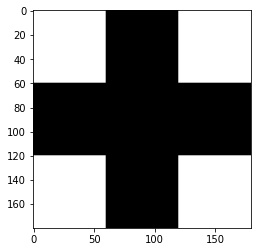

In [8]:
croix_binaire =[[1,0,1], [0,0,0], [1,0,1]]
matrice_to_image(croix_binaire, fichier = 'croix_binaire.png', res = 60)

## Exercice 5

In [9]:
def generer_croix(couleur):
    blanc = [255,255,255]
    croix = [[blanc, couleur, blanc],[couleur] * 3,[blanc, couleur, blanc]]
    matrice_to_image(croix, mode = 'RGB', res = 100, fichier='croix.png')  

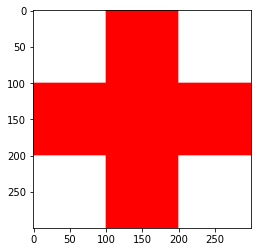

In [10]:
generer_croix([255,0,0])

## Exercice 6

In [11]:
def drapeau_3bandes_verticales(nlig, ncol, couleur1, couleur2, couleur3):
    """Retourne la matrice de pixels de l'image d'un drapeau
    comportant trois bandes verticales de couleurs couleur1, couleur2, couleur3"""
    #on crée une matrice vide de bonnes dimensions
    pix = matrice_vide(ncol, nlig, 'RGB')
    tiers_colonne = ncol // 3
    deux_tiers_colonne = 2 * tiers_colonne
    for x in range(ncol): #boucle sur les colonnes
        for y in range(nlig): #boucle sur les lignes
            if   x < tiers_colonne:
                pix[y][x] = couleur1
            elif x < deux_tiers_colonne:
                pix[y][x] = couleur2
            else:
                pix[y][x] = couleur3
    return pix

def transpose(pix, mode):
    """Retourne la transposée tpix d'une matrice de pixels pix :
    tpix[y][x] = pix[x][y]
    """
    ncol, nlig  = dimensions(pix)
    tpix = matrice_vide(nlig, ncol, mode)
    for x in range(nlig): #boucle sur les colonnes
        for y in range(ncol): #boucle sur les lignes
            #les lignes d'index paires seront noires
            tpix[y][x] = pix[x][y]
    return tpix

def drapeau_3bandes_horizontales(nlig, ncol, couleur1, couleur2, couleur3):
    """Retourne la matrice de pixels de l'image d'un drapeau
    comportant trois bandes verticales de couleurs couleur1, couleur2, couleur3"""
    #on crée une matrice vide de bonnes dimensions
    return transpose(drapeau_3bandes_verticales(ncol, nlig, couleur1, couleur2, couleur3), 'RGB')


In [12]:
assert transpose([[0]],'L') == [[0]]
assert transpose([[1,2],[4,5]], 'L') == [[1,4],[2,5]]
assert transpose([[1,2,3],[4,5,6]],'L') == [[1,4],[2,5],[3,6]]
assert transpose([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]],'RGB') == [[[1,2,3],[7,8,9]],[[4,5,6],[10,11,12]]]

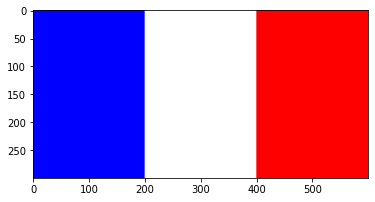

In [13]:
matrice_to_image(drapeau_3bandes_verticales(3,6,[0,0,255],[255,255,255], [255,0,0]),
                 mode='RGB', fichier='drapeau-france.png', res = 100)

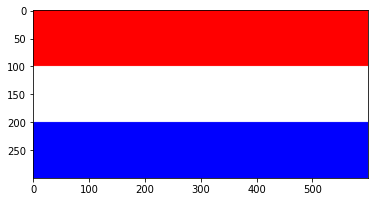

In [14]:
matrice_to_image(drapeau_3bandes_horizontales(3,6,[255,0,0], [255,255,255],[0,0,255]),
                 mode='RGB', fichier='drapeau-hollande.png', res = 100)

## Exercice 7

In [15]:
def barres_horizontales(nlig, ncol):
    """Retourne la matrice de pixels d'une image
    de dimensions ncol x nlig avec alternance 
    de lignes noires (index pair)
    ou blanches (index impair)"""
    #on crée une matrice vide de bonnes dimensions
    pix = matrice_vide(ncol, nlig, '1')
    for x in range(ncol): #boucle sur les colonnes
        for y in range(nlig): #boucle sur les lignes
            #les lignes d'index paires seront noires
            pix[y][x] = y % 2
    return pix 

In [16]:
barres_horizontales(4, 5)

[[0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [1, 1, 1, 1, 1]]

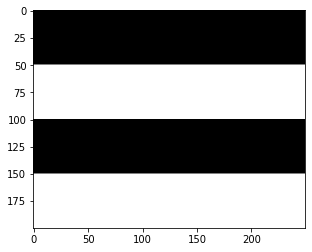

In [17]:
matrice_to_image(barres_horizontales(4, 5), fichier = 'bandes-horizontales.png', mode='1', res = 50)

In [18]:
def damier(nlig, ncol):
    """Retourne la matrice de pixels de l'image binaire d'un damier
    ligne et colonne de même parité : blanc   sinon : noir
    """
    pix = matrice_vide(ncol, nlig, '1')
    for x in range(ncol): #boucle sur les colonnes
        for y in range(nlig): #boucle sur les lignes
            if y % 2 == x % 2:
                pix[y][x] = 0
            else:
                pix[y][x] = 1
    return pix

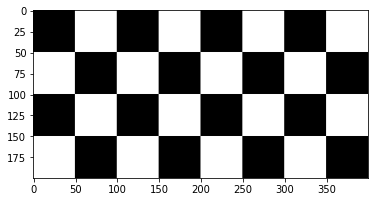

In [19]:
matrice_to_image(damier(4,8), fichier="damier.png", mode='1', res = 50)

## Exercice 8

In [20]:
def applique_filtre(pix, filtre, mode):
    assert mode in ['1', 'L', 'RGB'], "mode doit appartenir à ['1', 'L', 'RGB']"
    ncol, nlig = dimensions(pix)
    pix_but = matrice_vide(ncol, nlig, mode)
    for x in range(ncol): #boucle sur les colonnes
        for y in range(nlig): #boucle sur les lignes
            pix_but[y][x] = filtre(pix[y][x])
    return pix_but

### Filtre négatif

In [21]:
def filtre_negatif_gris(pixel):
    """Filtre négatif pour image en niveaux de gris"""
    return 255 - pixel

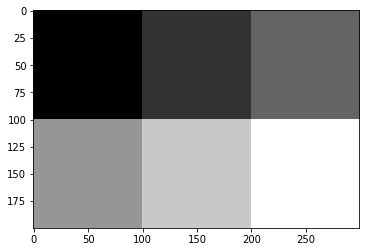

In [22]:
exemple_gris = image_to_matrice('exemple_gris.png')
matrice_to_image(exemple_gris, mode='L', res=1)

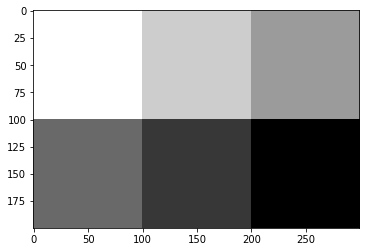

In [23]:
exemple_gris = image_to_matrice('exemple_gris.png')
exemple_gris_negatif = applique_filtre(exemple_gris, filtre_negatif_gris, 'L')
matrice_to_image(exemple_gris_negatif, fichier='exemple_gris_negatif.png', mode='L', res=1)

In [24]:
def filtre_negatif_rgb(pixel):
    """Filtre négatif pour image  en RGB"""
    newpixel = [0] * 3
    for k in range(3):
        newpixel[k] =  255 - pixel[k]
    return newpixel

In [25]:
assert filtre_negatif_rgb([255,0,100]) == [0,255,155]

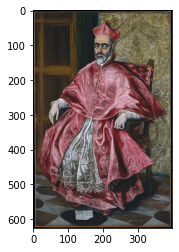

In [26]:
cardinal = image_to_matrice('cardinal.jpg')
matrice_to_image(cardinal, mode='RGB', res=1)

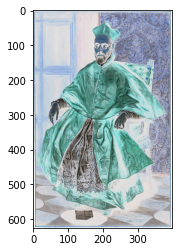

In [27]:
cardinal = image_to_matrice('cardinal.jpg')
cardinal_negatif = applique_filtre(cardinal, filtre_negatif_rgb, 'RGB')
matrice_to_image(cardinal_negatif, fichier='cardinal-negatif.png', mode='RGB',res=1)

### Filtre de seuillage

In [28]:
def fonction_seuil(val, seuil, vmin, vmax):
    """Retourne vmax si val > seuil
    et vmin sinon"""
    if val <= seuil:
        return vmin
    return vmax

def filtre_seuillage_gris(seuil):
    """Retourne une fonction filtre de seuillage pour une image en niveaux de gris
    et pour le seuil choisi"""    
    def f(pixel):
        return fonction_seuil(pixel, seuil, 0, 255)    
    return f

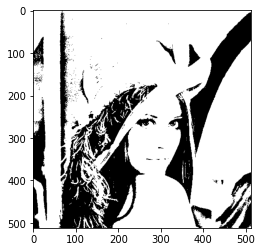

In [30]:
lena = image_to_matrice('lena.png')
lena_seuil = applique_filtre(lena, filtre_seuillage_gris(100),'L')
matrice_to_image(lena_seuil, fichier = 'lena-seuil.png', mode = 'L', res = 1)

### Filtre de composantes

In [33]:
def filtre_rouge(pixel):
    """Filtre un pixel RGB en le projetant sur sa composante rouge"""
    newpixel = [0] * 3
    newpixel[0] = pixel[0]
    return newpixel

In [34]:
assert filtre_rouge([255,0,0]) == [255,0,0]
assert filtre_rouge([255,255,0]) == [255,0,0]
assert filtre_rouge([255,255,255]) == [255,0,0]
assert filtre_rouge([0,255,0]) == [0,0,0]

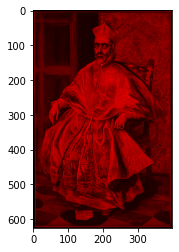

In [35]:
cardinal_rouge = applique_filtre(cardinal, filtre_rouge,'RGB')
matrice_to_image(cardinal_rouge, mode ='RGB', res= 1, fichier='cardinal-rouge.png')

In [37]:
def filtre_composante_rgb(index_comp):
    """Retourne une fonction de filtre qui projette un pixel
    sur la composante indexée en paramètre"""    
    def f(pixel):
        newpixel = [0] * 3
        newpixel[index_comp] = pixel[index_comp]
        return newpixel
    return  f

In [38]:
assert filtre_composante_rgb(0)([255,200,100]) == [255,0,0]
assert filtre_composante_rgb(1)([255,200,100]) == [0,200,0]
assert filtre_composante_rgb(2)([255,200,100]) == [0,0,100]

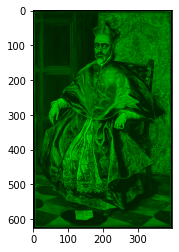

In [39]:
cardinal_vert = applique_filtre(cardinal, filtre_composante_rgb(1), 'RGB')
matrice_to_image(cardinal_vert, mode ='RGB', res= 1, fichier='cardinal-vert.png')

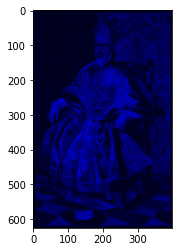

In [40]:
cardinal_bleu = applique_filtre(cardinal, filtre_composante_rgb(2),'RGB')
matrice_to_image(cardinal_bleu, mode ='RGB', res= 1, fichier='cardinal-bleu.png')

## Filtre monochrome

In [41]:
def filtre_monochrome(pixel_rgb):
    """Retourne la moyenne pondérée des composantes
    d'un pixel RGB par les coefs [0.299,0.587,0.114]"""
    coef = [0.299,0.587,0.114]
    pixel_gris = 0
    somme_coef = 0
    for k in range(3):
        pixel_gris = pixel_gris + pixel_rgb[k] * coef[k]
        somme_coef = somme_coef + coef[k]
    return int(pixel_gris / somme_coef)

def filtre_monochrome_coef(coef):
    """Retourne une fonction de filtre de conversion en niveaux de gris
    selon une liste de coefficients de pondération des composantes"""
    
    def h(pixel):
        """Convertit en niveau de gris un pixel RGB
        en faisant la moyenne pondérée de ses composantes"""
        pixel_gris = 0
        somme_coef = 0
        for k in range(3):
            pixel_gris += pixel[k] * coef[k]
            somme_coef += coef[k]
        return int(pixel_gris / somme_coef)
    
    return h

In [42]:
assert filtre_monochrome([255,100,200]) == 157
assert filtre_monochrome([200,255,100]) == 220
assert filtre_monochrome([100,200,255]) == 176

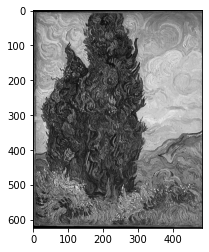

In [43]:
cypres = image_to_matrice('cypres.bmp')
cypres_gris = applique_filtre(cypres, filtre_monochrome_coef([0.299,0.587,0.114]),'L')
matrice_to_image(cypres_gris, mode ='L', res= 1, fichier='cypres-gris.png')